In [2]:
import pandas as pd
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

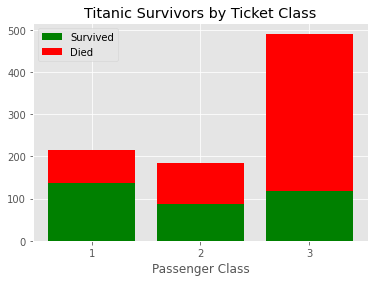

In [5]:
import matplotlib.pyplot as plt

dead = data.query('Survived == 0')['Pclass'].value_counts()
alive = data.query('Survived == 1')['Pclass'].value_counts()

plt.style.use('ggplot')

x = ['1','2','3']
a = [alive[1],alive[2],alive[3]]
d = [dead[1], dead[2], dead[3]]

plt.bar(x, a, color='green', label = 'Survived')
plt.bar(x, d, bottom=a,color= "red", label= 'Died')
plt.title("Titanic Survivors by Ticket Class")
plt.xlabel('Passenger Class')
plt.legend()

plt.show()

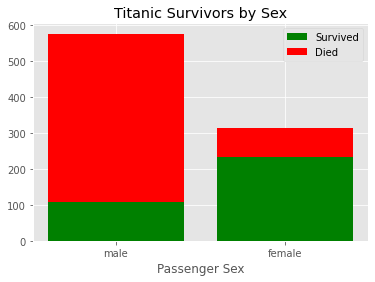

In [6]:
deadG = data.query('Survived == 0')['Sex'].value_counts()
aliveG = data.query('Survived == 1')['Sex'].value_counts()

plt.style.use('ggplot')

x = ['male','female']
ag = [aliveG['male'],aliveG['female']]
dg = [deadG['male'], deadG['female']]

plt.bar(x, ag, color='green', label = 'Survived')
plt.bar(x, dg, bottom=ag,color= "red", label= 'Died')
plt.title("Titanic Survivors by Sex")
plt.xlabel('Passenger Sex')
plt.legend()

plt.show()

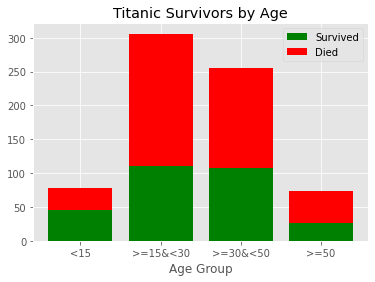

In [7]:
deadUnder15 = data.query('Survived == 0 and Age<15').count()[0]
deadUnder30 = data.query('Survived == 0 and Age>=15 and Age<30').count()[0]
deadUnder50 = data.query('Survived == 0 and Age>=30 and Age<50').count()[0]
deadOver50 = data.query('Survived == 0 and Age>=50').count()[0]

aliveUnder15 = data.query('Survived == 1 and Age<15').count()[0]
aliveUnder30 = data.query('Survived == 1 and Age>=15 and Age<30').count()[0]
aliveUnder50 = data.query('Survived == 1 and Age>=30 and Age<50').count()[0]
aliveOver50 = data.query('Survived == 1 and Age>=50').count()[0]


plt.style.use('ggplot')

x = ['<15','>=15&<30','>=30&<50','>=50']
aa = [aliveUnder15,aliveUnder30, aliveUnder50,aliveOver50]
da = [deadUnder15,deadUnder30, deadUnder50,deadOver50]

plt.bar(x, aa, color='green', label = 'Survived')
plt.bar(x, da, bottom=aa,color= "red", label= 'Died')
plt.title("Titanic Survivors by Age")
plt.xlabel('Age Group')
plt.legend()

plt.show()

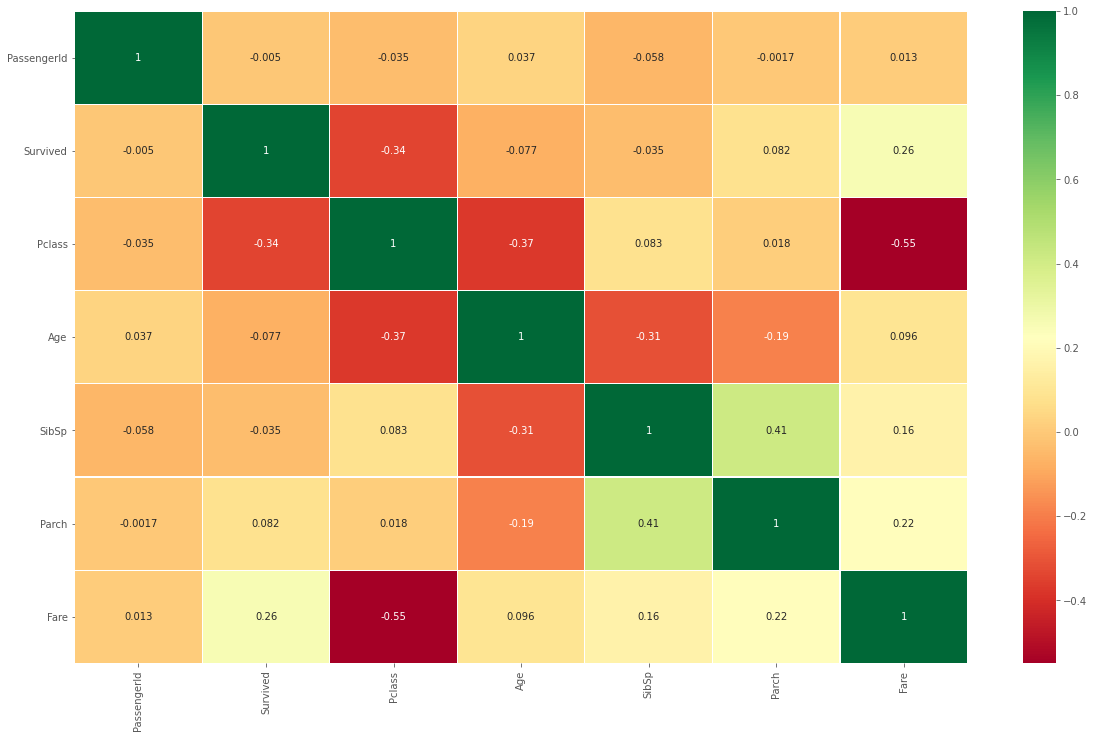

In [8]:
import seaborn as sns

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from time import time

In [19]:
print(data.drop(['Survived','Ticket','Cabin','PassengerId'], axis =1))

     Pclass  ... Embarked
0         3  ...        S
1         1  ...        C
2         3  ...        S
3         1  ...        S
4         3  ...        S
..      ...  ...      ...
886       2  ...        S
887       1  ...        S
888       3  ...        S
889       1  ...        C
890       3  ...        Q

[891 rows x 8 columns]


In [21]:
#X Y Split
Y_train = data['Survived']
X_train = data.drop(['Survived','Ticket','Cabin','PassengerId'], axis =1) #drop weird features

#drop the name we will look at titles later
X_train = X_train.drop(['Name'], axis =1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [25]:
#split into categorical and numerical features

numerical_features = data.select_dtypes(include=['int64','float64']).columns
categorical_features = data.select_dtypes(include=['object', 'bool']).columns

print(numerical_features)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [28]:
#Pclass should be categorical should be ordinal

print(X_train)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         3    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         3  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         3    male  35.0      0      0   8.0500        S
..      ...     ...   ...    ...    ...      ...      ...
886       2    male  27.0      0      0  13.0000        S
887       1  female  19.0      0      0  30.0000        S
888       3  female   NaN      1      2  23.4500        S
889       1    male  26.0      0      0  30.0000        C
890       3    male  32.0      0      0   7.7500        Q

[891 rows x 7 columns]


In [27]:
data_transformer = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numerical_features),
    (make_pipeline(SimpleImputer(strategy = 'most_frequent'),
                   OneHotEncoder(handle_unknown='ignore')), categorical_features)
)

X_train_transformed = data_transformer.fit_transform(X_train)
column_names = list(numerical_features) + list(data_transformer.transformers_[1][1].named_steps['onehotencoder'].get_feature_names(categorical_features))

display(pd.DataFrame(X_train_transformed, columns=column_names).head())
n_inputs = X_train_transformed.shape[1]


ValueError: ignored

In [30]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from time import time

#X Y Split
Y_train = data['Survived']
X_train = data.drop(['Survived','Ticket','Cabin','PassengerId'], axis =1) #drop weird features

#drop the name we will look at titles later
X_train = X_train.drop(['Name'], axis =1)
X_train.head()

#split into categorical and numerical features
numerical_features = X_train.select_dtypes(include=['int64','float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns


data_transformer = make_column_transformer(
    
    (make_pipeline(SimpleImputer(), StandardScaler()), numerical_features),

    (make_pipeline(SimpleImputer(strategy = 'most_frequent'),
                   OneHotEncoder(handle_unknown='ignore')), categorical_features)
    
)

X_train_transformed = data_transformer.fit_transform(X_train)
column_names = list(numerical_features) + list(data_transformer.transformers_[1][1].named_steps['onehotencoder'].get_feature_names(categorical_features))


display(pd.DataFrame(X_train_transformed, columns=column_names).head())
n_inputs = X_train_transformed.shape[1]

#try different models
clf_pipe = make_pipeline(
    data_transformer,
    RandomForestClassifier()
)



start = time()
clf_pipe.fit(X_train, Y_train)
train_time = np.round(time() - start, 4)

trainAcc = clf_pipe.score(X_train, Y_train)

validAcc=0
testAcc=0
test_time=0

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline 1 LogReg with {n_inputs} inputs", "Titanic classes", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "Baseline 1 LogReg pipeline with Cat+Num features"]

experimentLog


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


,Pipeline,Dataset,TrainAcc,ValidAcc,TestAcc,Train Time(s),Test Time(s),Description
0,Baseline 1 LogReg with 10 inputs,Titanic classes,98.20%,0.00%,0.00%,0.2086,0,Baseline 1 LogReg pipeline with Cat+Num features
1,Baseline 1 LogReg with 10 inputs,Titanic classes,98.20%,0.00%,0.00%,0.2246,0,Baseline 1 LogReg pipeline with Cat+Num features
2,Baseline 1 LogReg with 10 inputs,Titanic classes,80.13%,0.00%,0.00%,0.0252,0,Baseline 1 LogReg pipeline with Cat+Num features
3,Baseline 1 LogReg with 10 inputs,Titanic classes,98.20%,0.00%,0.00%,0.2379,0,Baseline 1 LogReg pipeline with Cat+Num features


In [ ]:

param_grid =[
             {'classifier': [LogisticRegression()],
              'classifier_penalty': ['l1','l2'],
              'classifier_C': np.logspace(-4,4,20),
              'classifier_solver': ['liblinear']}
]

clf = GridSearchCV(clf_pipe, param_grid = param_grid, cv = 5, n_jobs = 1, verbose=True)
best_clf = clf.fit(X_train_tr, Y_train)
